In [1]:
import matplotlib.pyplot as plt
import numpy as np
from custom_sepsis import *

/Users/luisastue/miniconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [18]:
trainings = []
for i in range(54):
    try:
        trainings.append(Training.load(f"json/dqn/DQN-1e5-{i}_object.pkl"))
        trainings.append(Training.load(f"json/dqn/DQN-1M-{i}_object.pkl"))
        trainings.append(Training.load(f"json/dqn/DQN-5000-{i}_object.pkl"))
        trainings.append(Training.load(f"json/dqn/DQN-35000-{i}_object.pkl"))
    except Exception:
        pass

In [19]:
for training in trainings:
    training.save("data/dqn")

In [6]:
len(trainings)

17

In [ ]:
episode_rewards = [[np.sum(ep.rewards) for ep in tr.episodes] for tr in trainings]

In [10]:
min_length = min(len(rewards) for rewards in episode_rewards)
mean_reward = np.mean([rewards[:min_length] for rewards in episode_rewards], axis=0)


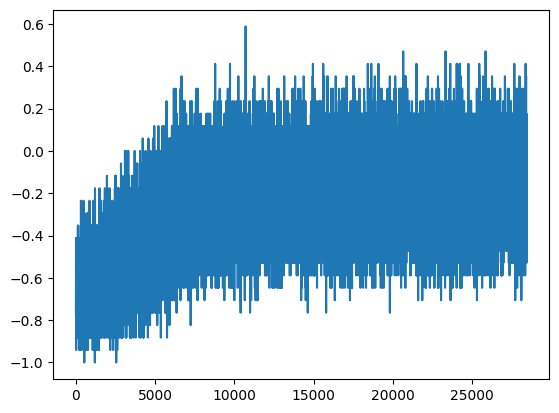

In [ ]:
mean_reward
plt.plot(mean_reward)


In [15]:
import json

# Assuming mean_reward is already defined
# Convert mean_reward to list of floats
mean_rewards = [float(x) for x in mean_reward]
# Compute missing values
smoothed_mean = np.convolve(mean_reward, np.ones(10)/10, mode='valid')
smoothed_std = np.std([np.convolve(rewards[:min_length], np.ones(10)/10, mode='valid') for rewards in episode_rewards], axis=0)
keys_of_smoothed = list(range(len(smoothed_mean)))


# Create the structure
means_type = {
    "individual_runs": [[float(x) for x in ep] for ep in episode_rewards],
    "mean_rewards": mean_rewards,
    "smoothed_mean": [float(x) for x in smoothed_mean],
    "smoothed_std": [float(x) for x in smoothed_std],
    "keys_of_smoothed": keys_of_smoothed
}

# Save as JSON
with open('json/dqn/sample_eff.json', 'w') as f:
    json.dump(means_type, f)